# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
cars_df = pd.read_csv("data/mtcars.csv")

In [3]:
cars_df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
cars_df

# Pre-processing
X_cars = cars_df.drop('mpg',axis=1)
y_cars = cars_df['mpg']

X_cars_model_one = cars_df[['hp','wt']]

X_cars_model_one

,hp,wt
0,110,2.620
1,110,2.875
2,93,2.320
3,110,3.215
4,175,3.440
5,105,3.460
6,245,3.570
7,62,3.190
8,95,3.150
9,123,3.440


In [5]:
# Setting up the LEARNER
X_cars_model_one = sm.add_constant(X_cars_model_one)

X_cars_model_one

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,hp,wt
0,1.0,110,2.620
1,1.0,110,2.875
2,1.0,93,2.320
3,1.0,110,3.215
4,1.0,175,3.440
5,1.0,105,3.460
6,1.0,245,3.570
7,1.0,62,3.190
8,1.0,95,3.150
9,1.0,123,3.440


In [6]:
model_sm_cars_one = sm.OLS(y_cars, X_cars_model_one)

# Actually LEARNING
results_cars_one = model_sm_cars_one.fit()



In [7]:
results_cars_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           9.11e-12
Time:                        10:24:27   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2273      1.599     23.285      0.000      33.957      40.497
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

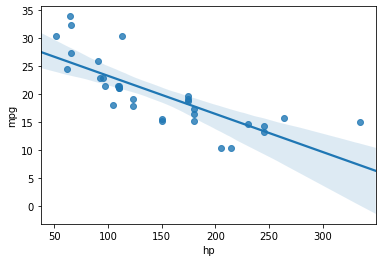

In [8]:
import seaborn as sns

sns.regplot(x = "hp", y = "mpg", data = cars_df)

# Try It Yourself!

In groups of four, work together to create your own multiple linear regression model.
There are a few classic datasets in the `data` directory.

First run a univariate regression model predicting a single varible in your dataset. For example, in the `diamonds.csv` dataset, you might want to predict `price`. If you are using the `flights.csv` data, you might want to predict delay time.

Second, run a multiple regression model with THREE variables. Make sure that you use correlation matrix to explore your data first! ``df.corr()`` can help you out!

Be prepared to share your model with the other groups! 

* Group 1 : diamonds.csv
* Group 2: flights.csv
* Group 3: iris.csv
* Group 4: txhouasing.csv
* Group 5: mtcars.csv

Don't worry about breaking assumptions for now, when we share, we will talk about what rules we did and did not break! 

In [9]:
!ls data

diamonds.csv  flights.csv   iris.csv      mtcars.csv    txhousing.csv


# Expanding on Yesterday's Simulation

In [ ]:
# This is just generating data
n = 200
x1 = np.random.sample(n)*20
x2 = np.random.sample(n)*20 #-3*x1 
x3 = np.random.sample(n)*20

X = (x1,x2,x3)
a = np.random.sample(n)*20 + 50

B = (3.5,-1.5,.005)
b1,b2,b3 = B
y = b1*x1 + b2*x2 + b3*x3 + a

# We don't add the random error to our dataset because in real life it is unknown
df = pd.DataFrame({'feature1':x1,'feature2':x2,'feature3':x3})

In [ ]:
# Having a look at the data

df['target'] = y

# fig, ax = plt.subplots()
for x in X:
    plt.figure()
    plt.scatter(x,y)
    plt.show()

print(df.shape)
df.head()

In [ ]:
# Pre-processing
X = df.drop('target',axis=1)
y = df['target']

### Regression in [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.linear_model import LinearRegression

# Setting up the LEARNER
model_skl = LinearRegression(fit_intercept=True,
                             normalize=False,
                             n_jobs=-1
                            )

# Actually LEARNING
model_skl.fit(X,y)

# Evaluating performance
r2 = model_skl.score(X,y)
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# Understanding the LEARNED model
est_a = model_skl.intercept_
est_B = model_skl.coef_
print('constant: {}'.format(round(est_a,4)))
print('coeficients: real {} vs {} estimated'.format(B,est_B.round(4)))

### Regression in [Statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) and its [Interpretation](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults)

In [ ]:
import statsmodels.api as sm

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

### Statsmodels superpower

### Multicolinearity exploration

In [ ]:
# MT Cars